In [197]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import random

#### Exercise 1

In [11]:
def exponential_cummulativ_distribution_sampler(size):
    
    def inverse_exponential_cummulativ_distribution(x):
        return(np.log(1-x))**2
    
    unif_sample = np.random.uniform(0,1,size)
    
    return [inverse_exponential_cummulativ_distribution(x) for x in unif_sample]
# If time is left sample from this and from the implemented function and calculate diff

#### Exercise 2

In [175]:
def posterior_sampler(likelihood, prior, wrapper, alpha, size):
    
    # 1.sampling from g
    wrapper_sample = wrapper.sample(size)
    
    # 2.sample from uniform distribution
    unif_sample = np.random.uniform(0,1,size)
    
    # 3.decide whether to accept or reject a proposed value
    posterior_sample = [y for y,u in np.array([wrapper_sample,unif_sample]).T if u <= (likelihood.evaluate_pdf(y)*prior.evaluate_pdf(y))/(wrapper.evaluate_pdf(y)*alpha) ]
    
    return posterior_sample

In [176]:
class poisson_likelihood():
    
    def __init__(self,data):
        self.data = data
        
    def evaluate_pdf(self,x): 
        return np.prod([scipy.stats.poisson(x).pmf(obs) for obs in self.data])
   
# return lam**x * np.exp(-lam) / np.math.factorial(x)

In [184]:
class log_normal_prior():
    
    def __init__(self,mu,sig):
        self.mu = mu
        self.sig = sig

    def evaluate_pdf(self,x):
        return scipy.stats.norm(self.mu, self.sig).pdf(np.log(x))
    
    def sample(self,size):
        return np.exp(np.random.normal(self.mu, self.sig, size))

In [185]:
class poisson_wrapper():
    
    def __init__(self,lam,likelihood,prior):
        self.lam = lam
        self.likelihood = likelihood
        self.prior = prior
    
    def sample(self,size):
        return self.prior.sample(size)
    
    def evaluate_pdf(self,x):
        return self.likelihood.evaluate_pdf(self.lam) * self.prior.evaluate_pdf(x)

In [186]:
data=[8, 3, 4, 3, 1, 7, 2, 6, 2, 7]

In [191]:
sample = posterior_sampler(likelihood=poisson_likelihood(data=data), 
                  prior=log_normal_prior(mu=np.log(4),sig=0.5**2), 
                  wrapper=poisson_wrapper(lam=np.mean(data),likelihood=poisson_likelihood(data=data),prior=log_normal_prior(mu=np.log(4),sig=0.5**2)), 
                  alpha=1, 
                  size=1000)

In [192]:
len(sample)

498

The mean of the Data, e.g. the MLE, is:  4.3


<function matplotlib.pyplot.show(close=None, block=None)>

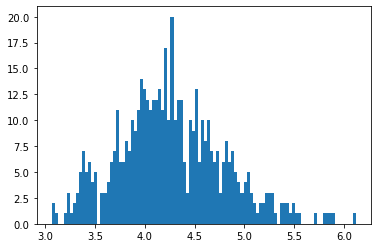

In [195]:
print("The mean of the Data, e.g. the MLE, is: ",np.mean(data))
plt.hist(sample,bins=100)
plt.show

Exercise 3

In [351]:
def metropolis_hasting_sampler(likelihood,prior,proposal,initial_estimate,length,seed):

    random.seed(seed)
    
    # 1.initialize chain
    current_estimate = initial_estimate
    chain = np.array([initial_estimate])
    
    for _ in range(length):
        
        # 2.draw proposal
        proposal_estimate = proposal.sample(current_estimate)
        
        # 3.compute acceptance ratio
        acceptance_ratio = (likelihood.evaluate_pdf(proposal_estimate)*prior.evaluate_pdf(proposal_estimate)) / (likelihood.evaluate_pdf(current_estimate)*prior.evaluate_pdf(current_estimate)) # * proposal.evaluate_pdf(current_estimate,proposal_estimate) / proposal.evaluate_pdf(proposal_estimate,current_estimate)
        
        # 4.draw acceptance or rejection and determine next chain value      
        if acceptance_ratio >= 1:
            current_estimate = proposal_estimate
        else:
            acceptance = scipy.stats.bernoulli.rvs(p=acceptance_ratio, size=1)
            if acceptance == 1:
                current_estimate = proposal_estimate
            else:
                pass
        
        # 5.store new chain value
        chain = np.append(chain, current_estimate)
    
    return chain

In [352]:
class normal_likelihood():
    
    def __init__(self,data,sig):
        self.data = data
        self.sig = sig
        
    def evaluate_pdf(self,x): 
        return np.prod([scipy.stats.norm(x,self.sig).pdf(obs) for obs in self.data])

In [353]:
class normal_prior():
    
    def __init__(self,mu,sig):
        self.mu = mu
        self.sig = sig

    def evaluate_pdf(self,x):
        return scipy.stats.norm(self.mu, self.sig).pdf(x)
    
    def sample(self,size):
        return np.random.normal(self.mu, self.sig, size)

In [354]:
class uniform_steps_proposal():
    
    def __init__(self,delta):
        self.delta = delta
        
    def evaluate_pdf(self,x,current_estimate):
        return 1/3
    
    def sample(self,current_estimate):
        return current_estimate + self.delta * np.random.uniform(0,1) * -1 * np.random.uniform(0,1)

In [355]:
class normal_proposal():
    
    def __init__(self,sig):
        self.sig = sig
        
    def evaluate_pdf(self,x,current_estimate): 
        return scipy.stats.norm(current_estimate, self.sig).pdf(x)
    
    def sample(self,current_estimate):
        return  np.random.normal(current_estimate, self.sig)

In [356]:
data = np.random.normal(1, 4, 100)

In [357]:
likelihood = normal_likelihood(data,4)
prior = normal_prior(0,2)
intial_estimate = 0
length = 1000
seed=0

proposal_1 = uniform_steps_proposal(0.5)
proposal_2 = normal_proposal(5)

In [358]:
chain1 = metropolis_hasting_sampler(likelihood,prior,proposal_1,intial_estimate,length,seed)

In [359]:
chain2 = metropolis_hasting_sampler(likelihood,prior,proposal_2,intial_estimate,length,seed)

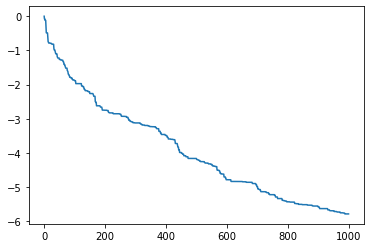

In [360]:
plt.plot(chain1)

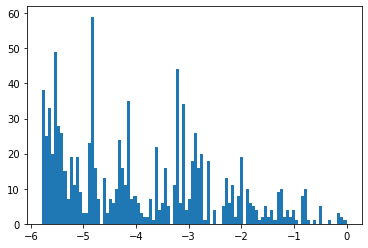

In [361]:
plt.hist(chain1,bins=100)
plt.show()

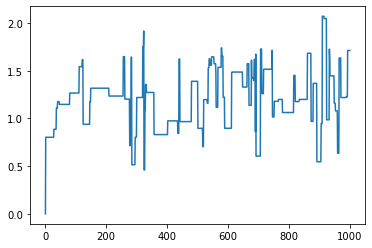

In [362]:
plt.plot(chain2)

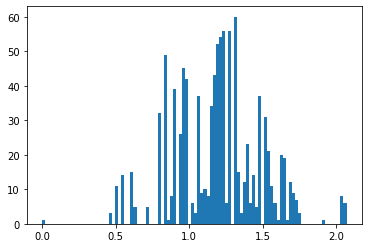

In [363]:
plt.hist(chain2,bins=100)
plt.show()

In [ ]:
#get normal normal data from normal distribution like in the slide, run long chain and compare the two histograms

Exercise 4

In [ ]:
# Derivation for the posterior based on the prior: https://artindatascience.wordpress.com/mathematical-proof-of-beta-conjugate-prior-to-binomial-and-bernoulli-likelihoods/
# Posterior: Beta(X + a, N + b -X) where X: summe(xi) and N: number of xi and a,b: parameters of prior

In [364]:
data=[13]

In [384]:
likelihood = normal_likelihood(data,4)
prior = normal_prior(0,2)
intial_estimate = 0
length = 10000
seed=0

proposal_3 = normal_proposal(0.05**2)

In [385]:
chain3 = metropolis_hasting_sampler(likelihood,prior,proposal_3,intial_estimate,length,seed)

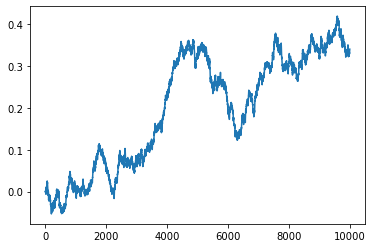

In [386]:
plt.plot(chain3)

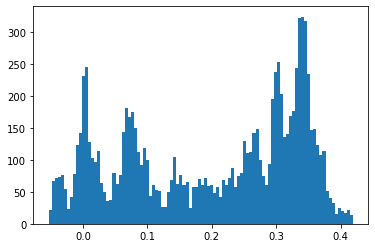

In [387]:
plt.hist(chain3,bins=100)
plt.show()

In [388]:
N=41
X=13
alpha=2
beta=2

In [389]:
posterior_draws = np.random.beta(X+alpha, N+beta-X, size=1000)

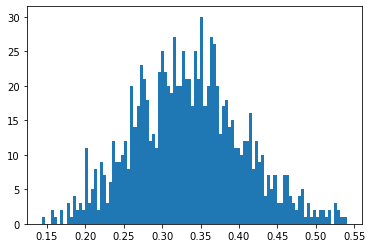

In [390]:
plt.hist(posterior_draws,bins=100)
plt.show()

In [ ]:
#the closer the proposal distribution to the true posterior the faster the convergence

Exercise 5

In [462]:
def gibbs_sampler(X1_init,X2_init,mu,sig,length,seed):

    random.seed(seed)
    
    # 1.initialize chain
    X1 = [X1_init]
    X2 = [X2_init]
    
    for _ in range(length):

        X1.append(np.random.normal(mu[0] + sig[0,1] / sig[1,1] * (X2[len(X2)-1]-mu[1]), sig[0,0] - sig[0,1]**2 / sig[1,1]))
        
        X2.append(np.random.normal(mu[1] + sig[0,1] / sig[0,0] * (X1[len(X1)-1]-mu[0]), sig[1,1] - sig[0,1]**2 / sig[0,0]))
    
    chain = np.array([X1,X2])
    
    return chain

In [463]:
sig=np.array([[1,0.7],[0.7,1]])
sig[0,0] - sig[0,1]**2/sig[1,1]

0.51

In [467]:
sample = gibbs_sampler(X1_init=0,X2_init=0,
              mu=np.array([2,1]),sig=np.array([[1,0.7],[0.7,1]]),
              length=1000000,seed=0)

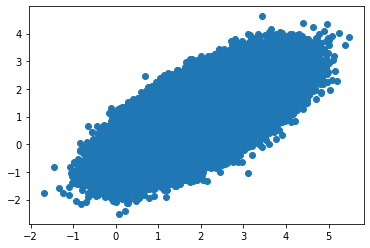

In [468]:
plt.scatter(sample[0,:],sample[1,:])

In [469]:
print("mu1 estimate: ",np.mean(sample[0,:]))
print("mu2 estimate: ",np.mean(sample[1,:]))
print("var1 estimate: ",np.var(sample[0,:]))
print("var2 estimate: ",np.var(sample[1,:]))
print("covar estimate: ",np.cov(sample))

mu1 estimate:  1.999552416624487
mu2 estimate:  0.9996020773928982
var1 estimate:  0.5112521734070803
var2 estimate:  0.5108547592002243
covar estimate:  [[0.51125268 0.35778857]
 [0.35778857 0.51085527]]
